<hr style="border:2px solid #0281c9"> </hr>

<img align="left" alt="ESO Logo" src="http://archive.eso.org/i/esologo.png">  

<div align="center">
  <h1 style="color: #0281c9; font-weight: bold;">ESO Science Archive</h1> 
  <h2 style="color: #0281c9; font-weight: bold;">Jupyter Notebooks</h2>
</div>

<hr style="border:2px solid #0281c9"> </hr>

# **Query by Source Name (position) and Examine Spectral Data**

In this example, we demonstrate how to retrieve all science-grade spectral data associated with a given astronomical source, using its known sky coordinates. This is particularly useful when targeting well-studied objects (e.g., named stars or galaxies) with observations available from multiple ESO instruments. We ensure that all relevant data products (e.g. from MUSE, XSHOOTER, or UVES in this case) are collected for cross-instrument comparison. The resulting spectra can then be downloaded and visualized to compare spectral resolution, wavelength coverage, or flux calibration across different setups.

<hr style="border:2px solid #0281c9"> </hr>

# **Importing and basic usage of astroquery.eso**

In [1]:
import astroquery # import astroquery
print(f"astroquery version: {astroquery.__version__}") # check the version of astroquery

astroquery version: 0.4.11.dev10290


In [2]:
from astroquery.eso import Eso # import the ESO module from astroquery

In [3]:
eso = Eso() # create an instance of the ESO class 

In [ ]:
# Numerical and Data Handling
import numpy as np  # Numerical operations and array handling

# Visualization
import matplotlib.pyplot as plt  # Core plotting library

# Astronomy and Astropy Core
import astropy.units as u  # Physical units and quantities
import astropy.constants as const  # Physical constants (e.g., c, G, h)
from astropy.io import fits  # Reading and writing FITS files
from astropy.coordinates import SkyCoord  # Celestial coordinate handling and conversions
from astropy.time import Time  # Time conversion and formatting (e.g., Julian Date, ISO)

# Specialized Astronomy Tools
from PyAstronomy import pyasl  # Tools for barycentric correction, RV calculations, etc.

**Note:** In the above, we import a relatively non-standard module `PyAstronomy` but this can be easily intalled with the following:
```bash
pip install PyAstronomy
```

In [ ]:
# Set the default font size and weight for plots
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['figure.dpi'] = 200

# **Performing a Small Cone Search Around Target(s)***

For this example, we consider a couple of standard stars observed as part of the [MUSE library of stellar spectra](https://www.eso.org/sci/publications/announcements/sciann17288.html) project ([Ivanov et al. 2019](https://ui.adsabs.harvard.edu/abs/2019A%26A...629A.100I/abstract)): 
* [HD 057060](http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=HD+057060&submit=SIMBAD+search)
* [HD 172230](http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=HD+172230&submit=SIMBAD+search) 

In this example, we are interested only to the optical data, so we limit the result of the queries to `em_min>4.0e-7 & em_max<1.2e-6` where the limits in wavelength are expressed in meters. In other words, we are limiting the wavelength coverage to: $4000 \mathring A < \lambda < 12000 \mathring A$. Additionally we're interested in spectra, so limit the search to specific instruments (e.g. `MUSE`, `XSHOOTER`, `UVES`) and a specific data type (e.g. `spectrum`).


In [5]:
star_names = ['HD 057060', 'HD 172230'] # List of star names

coords_HD057060 = SkyCoord.from_name(star_names[0])
coords_HD172230 = SkyCoord.from_name(star_names[1])

radius = 5 *u.arcsec # Radius of the search area

Define the current date and time to get only currently public observations (i.e. with `obs_release_date` later than now).

In [ ]:
now = Time.now() # Get the current time
now = str(now.datetime64.astype('datetime64[s]')) # Convert to datetime64 format

In [11]:
table_HD057060 = eso.query_surveys(column_filters={"dataproduct_type": "spectrum",
                                                  "em_min": ">4.0e-7",
                                                  "em_max": "<1.2e-6",
                                                  "obs_release_date": f"<= '{now}'"},
                                cone_ra=coords_HD057060.ra.value, 
                                cone_dec=coords_HD057060.dec.value, 
                                cone_radius=radius.to("deg").value) 

table_HD172230 = eso.query_surveys(column_filters={"dataproduct_type": "spectrum",
                                                    "em_min": ">4.0e-7",
                                                    "em_max": "<1.2e-6", 
                                                    "obs_release_date": f"<= '{now}'"},
                                    cone_ra=coords_HD172230.ra.value, 
                                    cone_dec=coords_HD172230.dec.value, 
                                    cone_radius=radius.to("deg").value)

In [ ]:
table_HD057060["target_name", "instrument_name", "proposal_id", "obs_id", "obs_collection", "obstech", "dp_id"]

target_name,instrument_name,proposal_id,obs_id,obs_collection,obstech,dp_id
object,object,object,object,object,object,object
HD_57060,UVES,076.B-0055(A),207936,UVES,ECHELLE,ADP.2020-07-10T21:41:17.392
2MASS-J07184037-2433312,XSHOOTER,084.B-0869(B),389588,XSHOOTER,"ECHELLE,SLIT,OFFSET",ADP.2017-06-02T19:41:04.876
HD057060,XSHOOTER,084.B-0869(B),389588,XSL,"ECHELLE,SLIT,OFFSET",ADP.2020-07-28T07:32:26.167
HD 057060,MUSE,099.D-0623(A),1687952,MUSE-STD,IFU,ADP.2020-02-26T15:36:25.254
HD_57060,UVES,076.B-0055(A),207935,UVES,ECHELLE,ADP.2020-07-10T21:41:17.417


In [20]:
table_HD172230["target_name", "instrument_name", "proposal_id", "obs_id", "obs_collection", "obstech", "dp_id"]

target_name,instrument_name,proposal_id,obs_id,obs_collection,obstech,dp_id
object,object,object,object,object,object,object
HD 172230,MUSE,099.D-0623(A),1687916,MUSE-STD,IFU,ADP.2020-02-26T15:36:25.276
HD172230,XSHOOTER,085.B-0751(A),480115,XSL,"ECHELLE,SLIT,NODDING",ADP.2020-07-28T07:32:26.286
HD_172230,UVES,079.D-0567(A),268942,UVES,ECHELLE,ADP.2021-09-16T14:46:40.592
2MASS-J18385494+0616147,XSHOOTER,085.B-0751(A),480115,XSHOOTER,"ECHELLE,SLIT,STARE",ADP.2014-05-15T16:36:53.210
2MASS-J18385494+0616147,XSHOOTER,085.B-0751(A),480115,XSHOOTER,"ECHELLE,SLIT,NODDING",ADP.2014-05-15T16:36:52.997
HD_172230,UVES,079.D-0567(A),268944,UVES,ECHELLE,ADP.2021-09-16T14:46:40.723


# **Downloading datasets from the archive**

In [14]:
# Download the data for HD 057060 and HD 172230 

data_files_HD057060 = eso.retrieve_data(table_HD057060['dp_id'], destination='./data/') 
data_files_HD172230 = eso.retrieve_data(table_HD172230['dp_id'], destination='./data/')

INFO: Downloading datasets ... [astroquery.eso.core]
INFO: Downloading 5 files ... [astroquery.eso.core]
INFO: Downloading file 1/5 https://dataportal.eso.org/dataPortal/file/ADP.2020-07-10T21:41:17.392 to /Users/abarnes/Library/CloudStorage/Dropbox/GitHub/astroquery_examples/data [astroquery.eso.core]
INFO: Found cached file /Users/abarnes/Library/CloudStorage/Dropbox/GitHub/astroquery_examples/data/ADP.2020-07-10T21:41:17.392.fits [astroquery.eso.core]
INFO: Downloading file 2/5 https://dataportal.eso.org/dataPortal/file/ADP.2017-06-02T19:41:04.876 to /Users/abarnes/Library/CloudStorage/Dropbox/GitHub/astroquery_examples/data [astroquery.eso.core]
INFO: Found cached file /Users/abarnes/Library/CloudStorage/Dropbox/GitHub/astroquery_examples/data/ADP.2017-06-02T19:41:04.876.fits [astroquery.eso.core]
INFO: Downloading file 3/5 https://dataportal.eso.org/dataPortal/file/ADP.2020-07-28T07:32:26.167 to /Users/abarnes/Library/CloudStorage/Dropbox/GitHub/astroquery_examples/data [astroquer

---
# **Explore the data**

Now the `MUSE`, `XSHOOTER`, and `UVES` optical spectra of `HD 057060` and `HD 172230` are on disk. You can explore them with your favourite tools. 

## **HD 057060** 

In [21]:
hdu_muse =      fits.open('./data/ADP.2020-02-26T15:36:25.254.fits') # MUSE dataset
hdu_xshooter = fits.open('./data/ADP.2020-07-28T07:32:26.167.fits') # XSHOOTER dataset
hdu_uves1 =     fits.open('./data/ADP.2020-07-10T21:41:17.392.fits') # UVES dataset 
hdu_uves2 =     fits.open('./data/ADP.2020-07-10T21:41:17.417.fits') # UVES dataset

**Function: `extract_spectrum`**

Extract the spectral information for plotting with the following ``extract_spectrum`` function. 
This applies the wavelengths corrections to get everything in ``SPECSYS`` in ``BARYCENT`` (from ``TOPOCENT`` or ``SOURCE``).
Some of the data do not have the correction factors for ``TOPOCENT`` so we calculate this from ``PyAstronomy`` package. 
Here we impose ``check_bary`` to see the correction factors, but they are only applied to the ``UVES`` data.

In [24]:
def extract_spectrum(hdu, instrument, verbose=False, check_bary=False):
    
    hdu_0 = hdu[0]
    hdu_1 = hdu[1]

    print(f'SPECSYS for {instrument}: {hdu_0.header["SPECSYS"]}')

    # Shifting to Ang.
    if hdu_1.header['TUNIT1'] == 'nm':
        wave_corr = 10. # Get to Ang.
    else:
        wave_corr = 1. # Already in Ang.

    # Perform barycentric correction
    if 'HIERARCH ESO QC VRAD BARYCOR' in hdu_0.header: 
        barycorr = hdu_0.header['HIERARCH ESO QC VRAD BARYCOR']
        wave_corr *= (1. + (barycorr/const.c.to('km/s').value))
        print(f'Barycentric correction for {instrument}: {barycorr}')
        
    elif 'HELICORR' in hdu_0.header:
        barycorr = hdu_0.header['HELICORR']
        wave_corr *= (1. + (barycorr/const.c.to('km/s').value))
        print(f'Barycentric correction for {instrument}: {barycorr}')

    no_bary = (hdu_0.header["SPECSYS"] == 'TOPOCENT') and ('HIERARCH ESO QC VRAD BARYCOR' not in hdu_0.header)
    if no_bary or check_bary: 
    
        ra = hdu[0].header['RA']
        dec = hdu[0].header['DEC']
        mjd = hdu[0].header['MJD-OBS'] # Modified JD for the observation
        jd = mjd + 2400000.5 # JD for the observation
        heliocorr, barycorr = pyasl.baryCorr(jd, ra, dec)
        if no_bary:
            wave_corr *= (1. + (barycorr/const.c.to('km/s').value))
        print(f'Barycentric correction for {instrument}: {barycorr} (using PyAstronomy)')
        
    if hdu_0.header['SPECSYS'] == 'SOURCE':
        sourcecorr = hdu_0.header['REST_VAL']
        wave_corr *= (1. + (sourcecorr/const.c.to('km/s').value))
        print(f'Source correction for {instrument}: {sourcecorr}')

    if instrument == 'MUSE':
        # No corrections needed for the MUSE spectrum - 'erg cm**(-2) s**(-1) angstrom**(-1)'
        flux_corr = 1.
    
    elif instrument == 'XSHOOTER':
        # No corrections needed for the MUSE spectrum - 'erg cm**(-2) s**(-1) angstrom**(-1)'
        flux_corr = 1.
    
    elif instrument == 'UVES':
        # Correcting the UVES spectrum by factor 1e-16 - 'erg s**(-1) cm**(-2) angstrom**(-1)'
        flux_corr = 1e-16
    
    spec_wave = hdu_1.data['WAVE'].squeeze() * wave_corr
    spec_flux = hdu_1.data['FLUX'].squeeze() * flux_corr
    spec_err = hdu_1.data['ERR'].squeeze() * flux_corr    

    spec_flux[spec_flux==0] = np.nan
    spec_err[spec_err==0] = np.nan
    
    if verbose:
        print('Content of the {} spectrum: \n {} \n'.format(instrument, hdu_1.columns))
        
    return spec_wave, spec_flux, spec_err    

# Extract the spectra from the FITS files
# The function returns the wavelength, flux and flux error of the spectrum for each instrument in an array
spec_muse_wave, spec_muse_flux, spec_muse_fluxerr = extract_spectrum(hdu_muse, 'MUSE', verbose=False, check_bary=True)
spec_xshooter_wave, spec_xshooter_flux, spec_xshooter_fluxerr = extract_spectrum(hdu_xshooter, 'XSHOOTER', verbose=False, check_bary=True)
spec_uves1_wave, spec_uves1_flux, spec_uves1_fluxerr = extract_spectrum(hdu_uves1, 'UVES', verbose=False, check_bary=True)
spec_uves2_wave, spec_uves2_flux, spec_uves2_fluxerr = extract_spectrum(hdu_uves2, 'UVES', verbose=False, check_bary=True) 

SPECSYS for MUSE: BARYCENT
Barycentric correction for MUSE: -19.668036026656434 (using PyAstronomy)
SPECSYS for XSHOOTER: SOURCE
Barycentric correction for XSHOOTER: -7.964341989000774 (using PyAstronomy)
Source correction for XSHOOTER: -137.6
SPECSYS for UVES: TOPOCENT
Barycentric correction for UVES: 18.30638609220451 (using PyAstronomy)
SPECSYS for UVES: TOPOCENT
Barycentric correction for UVES: 18.307295784007714 (using PyAstronomy)


**Function: `rescale_uves`**

This the following function we rescale the two UVES spectra to the same level, as we have the short and longer wavelengths to combine.

In [25]:
def rescale_uves(spec_uves1_wave, spec_uves2_wave, spec_uves1_flux, spec_uves2_flux, wave_min = 6710, wave_max = 6790):

    """
    Rescale the flux of the two UVES spectra to the same level in the region between wave_min and wave_max.

    Parameters
    spec_uves1_wave (numpy.ndarray): wavelength of the first UVES spectrum
    spec_uves2_wave (numpy.ndarray): wavelength of the second UVES spectrum
    spec_uves1_flux (numpy.ndarray): flux of the first UVES spectrum
    spec_uves2_flux (numpy.ndarray): flux of the second UVES spectrum
    wave_min (float): minimum wavelength to consider for the rescaling
    wave_max (float): maximum wavelength to consider for the rescaling
    """

    spec_uves1_wave_mask = (spec_uves1_wave>wave_min) & (spec_uves1_wave<wave_max)
    spec_uves2_wave_mask = (spec_uves2_wave>wave_min) & (spec_uves2_wave<wave_max)

    spec_uves1_flux_masked = spec_uves1_flux[spec_uves1_wave_mask]
    spec_uves2_flux_masked = spec_uves2_flux[spec_uves2_wave_mask]

    rescaling_factor_uves1 = np.nanmean(np.append(spec_uves1_flux_masked, spec_uves2_flux_masked)) / np.nanmean(spec_uves2_flux_masked)
    rescaling_factor_uves2 = np.nanmean(np.append(spec_uves1_flux_masked, spec_uves2_flux_masked)) / np.nanmean(spec_uves1_flux_masked)

    spec_uves1_flux = spec_uves1_flux / rescaling_factor_uves1
    spec_uves2_flux = spec_uves2_flux / rescaling_factor_uves2

    return spec_uves1_flux, spec_uves2_flux

spec_uves1_flux, spec_uves2_flux = rescale_uves(spec_uves1_wave, spec_uves2_wave, spec_uves1_flux, spec_uves2_flux)

**Function: `rescale_spectrum`**

Rescale the flux of the XSHOOTER and UVES spectra to the same level as the MUSE spectrum in the region between 7950 and 8050 Angstrom.

In [26]:
def rescale_spectrum(spex_wave, spec_flux, wave_min=7950, wave_max=8050):
    """
    Rescale the flux of the spectrum to the same level in the region between wave_min and wave_max.

    Parameters
    spex_wave (numpy.ndarray): wavelength of the spectrum
    spec_flux (numpy.ndarray): flux of the spectrum
    wave_min (float): minimum wavelength to consider for the rescaling
    wave_max (float): maximum wavelength to consider for the rescaling

    Returns
    norm (float): normalization factor
    """

    norm = np.nanmedian(spec_flux[(spex_wave>wave_min) & (spex_wave<wave_max)])
    return norm

norm_muse = rescale_spectrum(spec_muse_wave, spec_muse_flux)
norm_xshooter = rescale_spectrum(spec_xshooter_wave, spec_xshooter_flux)
norm_uves1 = rescale_spectrum(spec_uves1_wave, spec_uves1_flux)

spec_xshooter_flux_rescaled = spec_xshooter_flux * (norm_muse / norm_xshooter)
spec_uves1_flux_rescaled = spec_uves1_flux * (norm_muse / norm_uves1)
spec_uves2_flux_rescaled = spec_uves2_flux * (norm_muse / norm_uves1)

The following code block compares re-normalized spectra for **HD 057060** obtained with the three different instruments. The MUSE spectrum is plotted with its associated flux uncertainties, while the XSHOOTER and UVES data are shown both in their original and rescaled forms. This visualization helps assess relative flux calibration and spectral coverage across instruments.

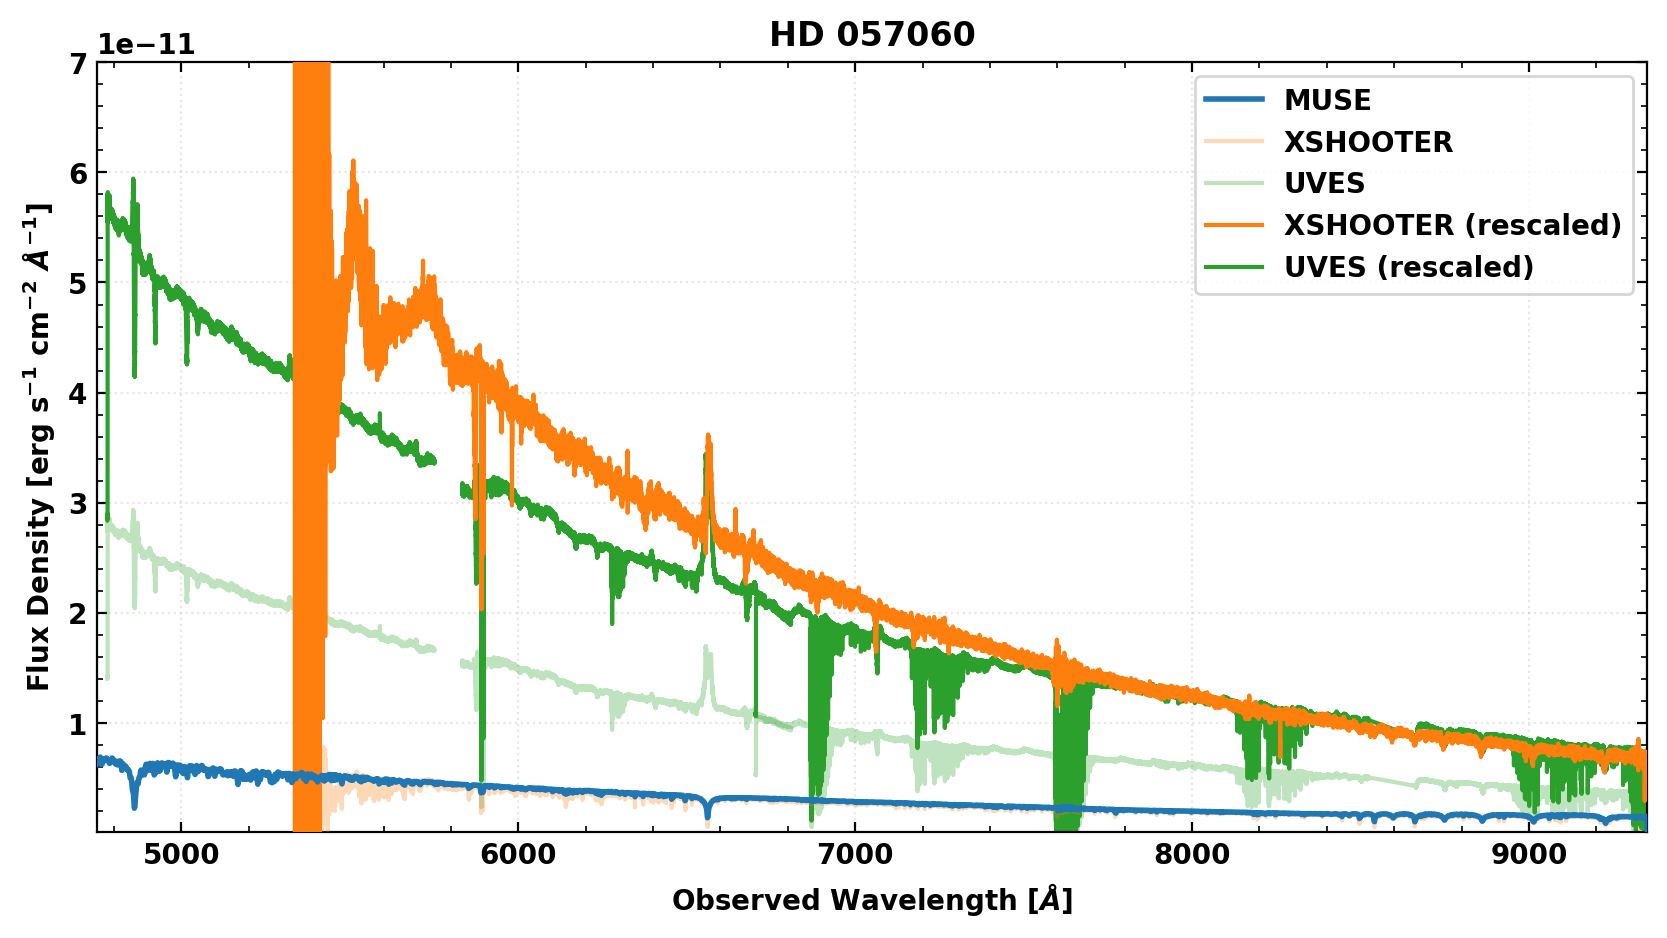

In [38]:
# Plot re-normalized spectra
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.plot(spec_muse_wave, spec_muse_flux, c='C0', label='MUSE', zorder=4, lw=2)
ax.fill_between(spec_muse_wave, spec_muse_flux-spec_muse_fluxerr, spec_muse_flux+spec_muse_fluxerr, color='C0', alpha=0.3, zorder=4)
ax.plot(spec_muse_wave, spec_muse_flux-spec_muse_fluxerr, c='C0', zorder=4, lw=0.5)
ax.plot(spec_muse_wave, spec_muse_flux+spec_muse_fluxerr, c='C0', zorder=4, lw=0.5)

ax.plot(spec_xshooter_wave, spec_xshooter_flux, c='C1', alpha=0.3, label='XSHOOTER', zorder=3)
ax.plot(spec_uves1_wave, spec_uves1_flux, c='C2', alpha=0.3, label='UVES', zorder=2)
ax.plot(spec_uves2_wave, spec_uves2_flux, c='C2', alpha=0.3, zorder=2)

ax.plot(spec_xshooter_wave, spec_xshooter_flux_rescaled, label=r'XSHOOTER (rescaled)', c='C1', zorder=3)
ax.plot(spec_uves1_wave, spec_uves1_flux_rescaled, label=r'UVES (rescaled)', c='C2', zorder=2)
ax.plot(spec_uves2_wave, spec_uves2_flux_rescaled, c='C2', zorder=2)

ax.set_xlim(min(spec_muse_wave), max(spec_muse_wave))
ax.set_ylim(0.1e-12, 7e-11)
ax.set_xlabel(r'Observed Wavelength [$\AA$]')
ax.set_ylabel(r'Flux Density [erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]')
ax.set_title(r'HD 057060')

ax.legend(loc='upper right')
ax.grid(True, ls=':', alpha=0.3)

fig.savefig('figs/HD057060.png', format='png', bbox_inches='tight')

## **HD 172230** 

In [29]:
hdu_muse =      fits.open('./data/ADP.2020-02-26T15:36:25.276.fits') # MUSE dataset
hdu_xshooter =  fits.open('./data/ADP.2020-07-28T07:32:26.286.fits') # XSHOOTER dataset
hdu_uves =      fits.open('./data/ADP.2021-09-16T14:46:40.723.fits') # UVES dataset

In [30]:
spec_muse_wave, spec_muse_flux, spec_muse_fluxerr = extract_spectrum(hdu_muse, 'MUSE', verbose=False)
spec_xshooter_wave, spec_xshooter_flux, spec_xshooter_fluxerr = extract_spectrum(hdu_xshooter, 'XSHOOTER', verbose=False, check_bary=True)
spec_uves_wave, spec_uves_flux, spec_uves_fluxerr = extract_spectrum(hdu_uves, 'UVES', verbose=False)

SPECSYS for MUSE: BARYCENT
SPECSYS for XSHOOTER: SOURCE
Barycentric correction for XSHOOTER: -6.427269161708439 (using PyAstronomy)
Source correction for XSHOOTER: -43.81
SPECSYS for UVES: TOPOCENT
Barycentric correction for UVES: 16.431138246236696 (using PyAstronomy)


**Function: `continuum_subtraction`**

Here we subtract the continuum level from the spectrum as we're interested in plotting only lines. 

In [31]:
def continuum_subtraction(wave, flux, wl_left_min=6423, wl_left_max=6428, wl_right_min=6685, wl_right_max=6690, poly_order=1):

    """ 
    Continuum subtraction using a polynomial fit 
    
    Parameters: 
    wavelength (numpy.ndarray): Array of wavelengths.
    flux (numpy.ndarray): Array of fluxes.
    wl_left_min (float): Minimum wavelength of the left continuum region.
    wl_left_max (float): Maximum wavelength of the left continuum region.
    wl_right_min (float): Minimum wavelength of the right continuum region.
    wl_right_max (float): Maximum wavelength of the right continuum region.
    poly_order (int): Order of the polynomial fit.

    Returns:
    flux_normalized (numpy.ndarray): Array of normalized fluxes.
    """

    poly_mask = (( (wave > wl_left_min) & (wave < wl_left_max) ) |
                    ( (wave > wl_right_min) & (wave < wl_right_max) ))
    poly_coeff = np.polyfit(np.log10(wave[poly_mask]), np.log10(flux[poly_mask]), deg=poly_order)
    flux_normalized = flux / 10.**(np.polyval(poly_coeff, np.log10(wave)))
    return flux_normalized

spec_muse_flux_normalized = continuum_subtraction(spec_muse_wave, spec_muse_flux)
spec_xshooter_flux_normalized = continuum_subtraction(spec_xshooter_wave, spec_xshooter_flux)
spec_uves_flux_normalized = continuum_subtraction(spec_uves_wave, spec_uves_flux)

spec_muse_fluxerr_normalized = spec_muse_flux_normalized * (spec_muse_fluxerr / spec_muse_flux)

In [32]:
def calculate_velocity(wavelength, reference_wavelength=6562.793):
    """
    Calculate the velocity relative to a given reference wavelength.

    Parameters:
    wavelength (numpy.ndarray): Array of wavelengths.
    reference_wavelength (float): The reference wavelength to calculate the velocity. Default is 6562.793 (H-alpha line).

    Returns:
    numpy.ndarray: Array of velocities in km/s.
    """
    return (wavelength / reference_wavelength - 1) * const.c.to('km/s').value

spec_uves_vel = calculate_velocity(spec_uves_wave)
spec_xshooter_vel = calculate_velocity(spec_xshooter_wave)
spec_muse_vel = calculate_velocity(spec_muse_wave)

We compare the Hα absorption line observed toward HD 172230 using the three ESO instruments, each with progressively higher spectral resolution. The differences in resolving power are clearly visible in the width and depth of the line profiles: MUSE (R~3000), XSHOOTER (R~10,000), and UVES (R~100,000). A small velocity shift is applied to the XSHOOTER spectrum for clarity. The vertical dashed line marks the measured stellar radial velocity (RV = −39.93 km/s), and the spectra are plotted in velocity space relative to the Hα line center.

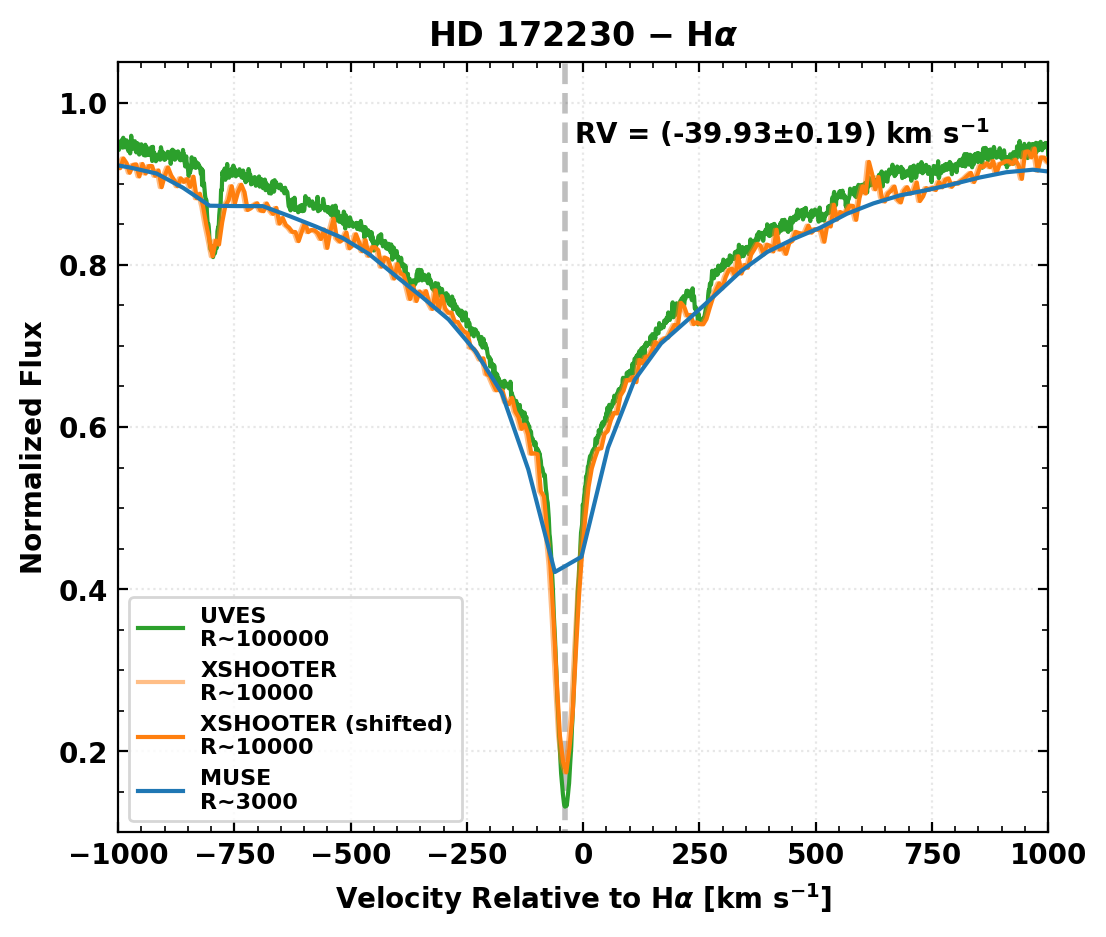

In [40]:
# Plot re-normalized spectra
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

radial_velocity = -39.93 # km/s
ax.plot([radial_velocity]*2, [-1,2], c='k', ls='--', lw=2, alpha=0.25)

ax.plot(spec_uves_vel, spec_uves_flux_normalized, label=r'UVES' + '\n' + 'R~100000', c='C2')
ax.plot(spec_xshooter_vel, spec_xshooter_flux_normalized, label=r'XSHOOTER' + '\n' + 'R~10000', c='C1', alpha=0.5)
shift = 4
ax.plot(spec_xshooter_vel+shift, spec_xshooter_flux_normalized, label=r'XSHOOTER (shifted)' + '\n' + 'R~10000', c='C1')
ax.plot(spec_muse_vel, spec_muse_flux_normalized, label=r'MUSE' + '\n' + 'R~3000', c='C0')

ax.set_xlim(-1000., 1000.)
ax.set_ylim(0.1, 1.05)
ax.text(radial_velocity+20, 0.95, r'RV = (-39.93$\pm$0.19) km s$^{-1}$', horizontalalignment='left')
ax.set_xlabel(r'Velocity Relative to H$\alpha$ [km s$^{-1}$]')
ax.set_ylabel(r'Normalized Flux')
ax.set_title(r'HD 172230 $-$ H$\alpha$')

ax.legend(loc='lower left', fontsize=8)
ax.grid(True, ls=':', alpha=0.3)

fig.savefig('./figs/HD172230_6562.png', format='png', bbox_inches='tight')

This plot highlights several metal absorption lines — **Ca I**, **Fe I**, and **Ba II** — in the spectrum of HD 172230. These lines provide insight into the stellar photospheric composition and are useful diagnostics for chemical abundance studies. The comparison across instruments shows the impact of spectral resolution on line profile shape and depth, with UVES providing the most detailed view (R~100,000). As before, the XSHOOTER spectrum is also shown with a slight wavelength shift for clarity.

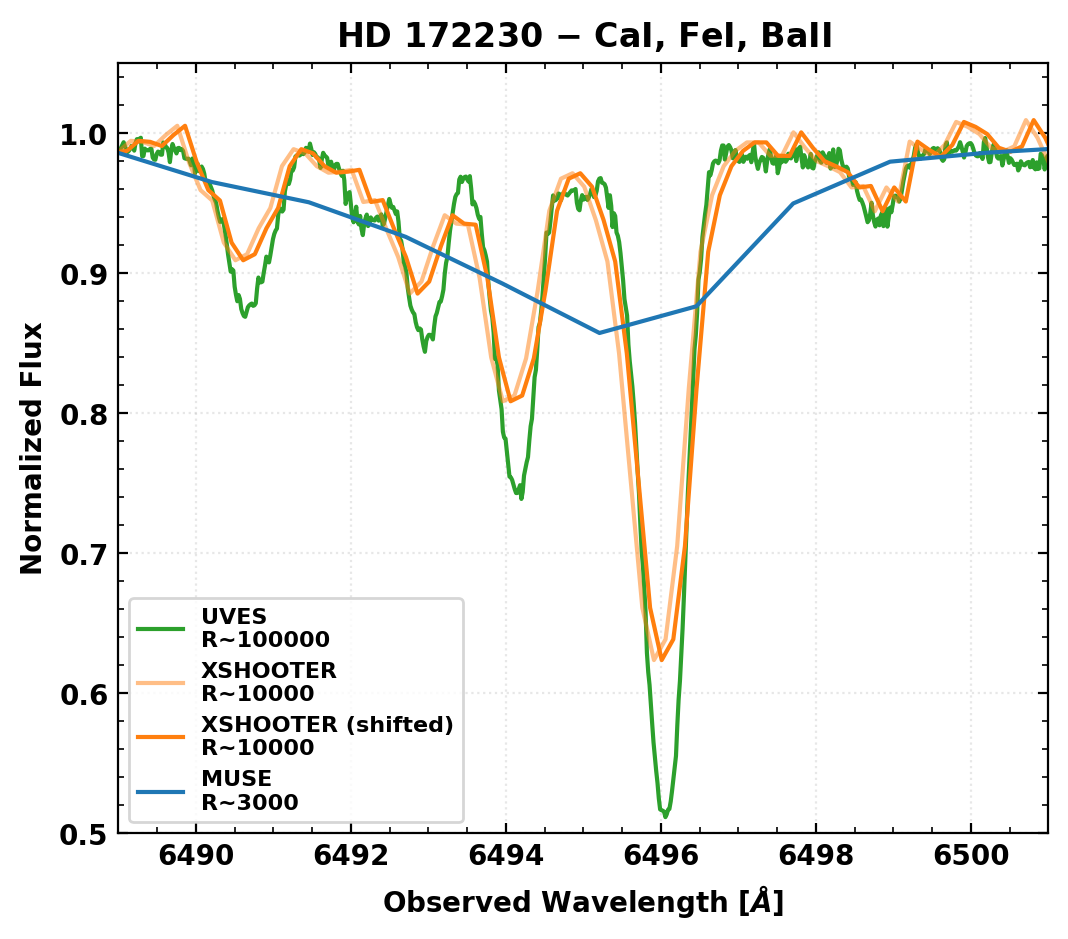

In [65]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.plot(spec_uves_wave, spec_uves_flux_normalized, label=r'UVES' + '\n' + 'R~100000', c='C2')
ax.plot(spec_xshooter_wave, spec_xshooter_flux_normalized, label=r'XSHOOTER' + '\n' + 'R~10000', c='C1', alpha=0.5)
shift = 0.1
ax.plot(spec_xshooter_wave+shift, spec_xshooter_flux_normalized, label=r'XSHOOTER (shifted)' + '\n' + 'R~10000', c='C1')

ax.plot(spec_muse_wave, spec_muse_flux_normalized, label=r'MUSE' + '\n' + 'R~3000', c='C0')

ax.set_xlim(6495.-6., 6495.+6.)
ax.set_ylim(0.5, 1.05)
ax.set_xlabel(r'Observed Wavelength [$\AA$]')
ax.set_ylabel(r'Normalized Flux')
ax.set_title(r'HD 172230 $-$ CaI, FeI, BaII')

ax.legend(loc='lower left', fontsize=8)
ax.grid(True, ls=':', alpha=0.3)

fig.savefig('./figs/HD172230_6490.png', format='png', bbox_inches='tight')

<hr style="border:2px solid #0281c9"> </hr>